In [1]:
from pathlib import Path
import pprint
import numpy as np
import shutil
import matplotlib.pyplot as plt

int_to_str = {0:"CPR:3", 1:"CPR:4", 2:"CPR:5", 3:"CPR:6", 4:"CPR:9", 5:"NULL"}

## Displaying results

We will now add the results of RE to the same annotation file

In [2]:
def generate_brat(prob_path,pair_path,ann_path):
    global diff_list
    
    # open file with probabilities
    prob = np.loadtxt(prob_path)
    m,n = prob.shape
    indices = np.argmax(prob,axis=1)
    max_val = np.max(prob,axis=1)
    
    # Extra steps not needed. Used for debugging
    prob[range(0,m),indices] = 0
    max_val2 = np.max(prob,axis=1)    
    diff_list.extend([(x,y) for x,y in zip(list(max_val-max_val2),list(indices))])
    
    class_ind = list(indices)
    count_list = [0]*6
    count = 0
    
    #Open intermediate pair file
    with open(pair_path,'r') as f:
        data = f.readlines()
        entity_pairs = [line.split() for line in data]
#     print(len(class_ind),len(entity_pairs))
    assert (len(class_ind)==len(entity_pairs))

    # Copy old ann file to a new file and remove the old_ prefix
    output_path = ann_path.parent / str(ann_path.name)[4:]
    shutil.copy(ann_path, output_path)
#     print(str(output_path))

    # Append new relations found to the newly created file
    with open(output_path,'a') as f:
        for i in range(len(class_ind)):
            count_list[class_ind[i]] += 1
            if(class_ind[i]==5):
                continue                   # Ignore the false case
            f.write("R" + str(count) + "\t" + int_to_str[class_ind[i]] + " Arg1:" + entity_pairs[i][0] + " Arg2:" + entity_pairs[i][1] + "\n")
            count += 1
    return count_list

In [3]:
count_dict = {}
diff_list = []

def walk_dir(root):
    global count_dict
    if(root.is_dir()):
        for child in root.iterdir():
            walk_dir(child)
    else:
        if(root.name == 'test_results.tsv'):
            pair_path = root.parent / 'pairs.tsv'
            ann_path = root.parent / ('old_' + str(root.parent.name) + '.ann')
            if(ann_path.exists() and ann_path.exists()):
                count_dict[root.parent.name] = generate_brat(root,pair_path,ann_path)

[  223.   127.     0.     0.  2042. 31562.]


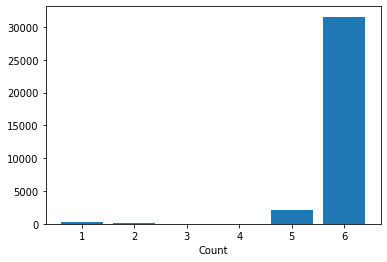

In [4]:
walk_dir(Path('../data/processed'))
# pprint.pprint(count_dict)

count = np.zeros(6)
for key in count_dict.keys():
    count += np.array(count_dict[key])
print(count)

plt.bar([1,2,3,4,5,6],count)
plt.xlabel('Count')
plt.show()

In [5]:
pprint.pprint(count_dict)

{'sb3000673': [0, 0, 0, 0, 3, 337],
 'sb3000723': [0, 0, 0, 0, 0, 137],
 'sb300074k': [0, 1, 0, 0, 65, 839],
 'sb3000782': [3, 0, 0, 0, 62, 657],
 'sb300091d': [3, 0, 0, 0, 7, 150],
 'sb300092n': [0, 0, 0, 0, 2, 188],
 'sb3001003': [0, 8, 0, 0, 24, 461],
 'sb4000355': [0, 0, 0, 0, 4, 223],
 'sb400065q': [0, 0, 0, 0, 4, 278],
 'sb4001118': [0, 0, 0, 0, 10, 284],
 'sb400112u': [4, 0, 0, 0, 29, 240],
 'sb400115e': [0, 0, 0, 0, 24, 330],
 'sb400136f': [0, 7, 0, 0, 26, 378],
 'sb4001382': [0, 15, 0, 0, 53, 374],
 'sb400142b': [0, 0, 0, 0, 7, 119],
 'sb500243c': [0, 0, 0, 0, 41, 243],
 'sb500291r': [0, 0, 0, 0, 0, 195],
 'sb500309r': [5, 1, 0, 0, 28, 484],
 'sb500368w': [0, 1, 0, 0, 82, 228],
 'sb5b00012': [0, 0, 0, 0, 1, 233],
 'sb5b00025': [0, 0, 0, 0, 39, 402],
 'sb5b00080': [1, 0, 0, 0, 0, 161],
 'sb5b00103': [1, 0, 0, 0, 21, 514],
 'sb5b00129': [0, 1, 0, 0, 19, 179],
 'sb5b00199': [19, 0, 0, 0, 9, 278],
 'sb5b00289': [0, 2, 0, 0, 39, 384],
 'sb6b00007': [1, 0, 0, 0, 32, 332],
 'sb6b0005

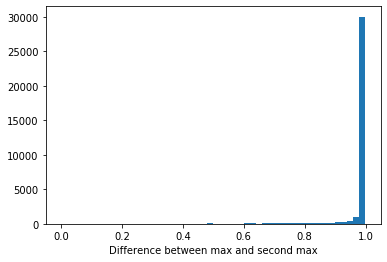

In [6]:
plt.hist([t[0] for t in diff_list],bins=50)
plt.xlabel('Difference between max and second max')
plt.show()

In [7]:
min(diff_list)

(4.2370000000013786e-05, 4)

In [8]:
sorted(diff_list)

[(0.00018853000000002007, 4),
 (0.0009168400000000299, 4),
 (0.0027029199999999975, 4),
 (0.003040160000000014, 5),
 (0.0044440000000000035, 4),
 (0.004489679999999996, 4),
 (0.004883369999999998, 5),
 (0.004945900000000003, 0),
 (0.006112969999999995, 5),
 (0.007498469999999979, 5),
 (0.007703020000000005, 4),
 (0.007746999999999948, 5),
 (0.007887970000000022, 4),
 (0.009045299999999978, 0),
 (0.009784520000000019, 5),
 (0.010260700000000011, 4),
 (0.011381890000000061, 5),
 (0.011503929999999996, 5),
 (0.012216470000000035, 4),
 (0.014383050000000008, 5),
 (0.01493650000000002, 5),
 (0.01499549, 5),
 (0.015716449999999993, 5),
 (0.016734950000000026, 5),
 (0.01696979999999998, 5),
 (0.017064639999999964, 1),
 (0.01731568, 4),
 (0.017418180000000005, 5),
 (0.01799034999999999, 5),
 (0.01829949999999997, 4),
 (0.018346260000000003, 4),
 (0.018660140000000047, 5),
 (0.018751480000000043, 4),
 (0.01879949999999997, 5),
 (0.019170400000000032, 5),
 (0.019544129999999993, 5),
 (0.01977858